# GAN(Generative Adversarial Network)

* 적대적 생성 모델

* 생성 모델 : 데이터의 형태를 만들어 내는 모델, 어떤 분포 혹은 분산 자체를 만들어내는 모델

* 적대적 : 지폐위조범(Generator)과 경찰(Discriminator)

* Generator: 새로운 데이터의 형태를 만들어 내는 모델, 판독 모델을 틀리도록 하는 역할(적대적 모델), 진짜 같은 가짜를 생성해내는 모델

* Discriminator: 데이터 판독 모델(Real, Fake 판독)

### 1) 공분산

공분산 행렬

```
                cov(x,x), cov(x,y)
                cov(y,x), cov(y,y)

```

In [50]:
import pandas as pd

df=pd.read_csv('d:/data/rides/rides.csv')

df.head()

,weekend,num.child,distance,rides,games,wait,clean,overall
0,yes,0,114.648259,87,73,60,89,47
1,yes,2,27.014097,87,78,76,87,65
2,no,1,63.300975,85,80,70,88,61
3,yes,0,25.909931,88,72,66,89,37
4,no,4,54.718307,84,87,74,87,68


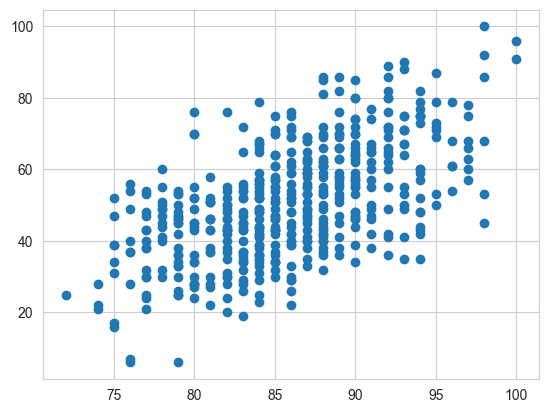

In [51]:
import matplotlib.pyplot as plt

plt.scatter(df.rides, df.overall)

plt.show()

# rides와 overall은 양의 상관관계가 있는 것으로 보임

In [ ]:
#공분산(Covariance): 두 변수의 상관정도를 나타내는 값, 두 변수가 같은 방향으로 움직이는 정도

#  x의 편차와 y의 편차를 곱한 값의 평균값

# X 증가 => y 증가 => 양수

# X 증가 => y 감소 => 음수

# 공분산이 0이면 두 변수는 선형관계가 없음

In [58]:
import numpy as np

np.cov(df.overall, df.rides)[0,1]
print(np.cov(df.overall, df.rides))
# 양수이므로 양의 상관관계임

# 공분산은 증가, 감소 방향을 이해할 수는 있으나 어느 정도의 상관관계인지 파악하기는 어려움

[[252.1316994   50.82939078]
 [ 50.82939078  29.84196794]]


In [4]:
print(np.cov([1,2,3,4,5], [2,3,4,5,6])[0,1])  # x,y가 같은 방향으로 증가하므로 양수

print(np.cov([1,2,3,4,5], [3,3,3,3,3])[0,1])  # x의 변화에 y가 영향을 받지 않으므로 0

2.5
0.0


In [5]:
print(np.cov([1,2,3,4,5], [5,4,3,2,1])[0,1])  # x,y의 증가 방향이 다르므로 음수

print(np.cov([10,20,30,40,50], [5,4,3,2,1])[0,1])

# 공분산은 변수의 단위에 크게 영향을 받는 단점이 있음.

# 이것을 보완하기 위해 공분산을 표준화시킨 상관계수를 사용함

-2.5
-25.0


In [ ]:
#상관계수 :  X와 Y가 함께 변하는 정도 / X와 Y가 각각 변하는 정도

# 공분산을 표준편차의 곱으로 나눈 값(-1 ~ 1)

# +1 : 완벽한 양의 상관관계, -1 : 완벽한 음의 상관관계

# 0 : 선형관계가 없음

# 피어슨 상관계수: 일반적으로 사용되는 방법, 숫자형-숫자형 변수, 정규분포인 경우 정확한 결과를 얻을 수 있음, 이상치에 민감함

# 스피어만 상관계수: 서열척도의 경우 사용

#   직선관계가 아니어도 상관관계가 있으면 1에 가까운 값을 갖게 됨

# 상관분석은 선형관계를 설명할 수는 있으나 인과관계(원인과 결과)를 설명하기는 어려움

# 원인과 결과를 설명하려면 회귀분석을 사용해야 함

In [6]:
print(np.corrcoef([1,2,3,4,5], [5,4,3,2,1])[0,1])  

print(np.corrcoef([10,20,30,40,50], [5,4,3,2,1])[0,1])

-0.9999999999999999
-1.0


* 다변수정규분포
  * N(x;μ,Σ)=1(2π)D/2|Σ|1/2exp(−12(x−μ)TΣ−1(x−μ))
  * 2차원 이상의 정규분포
  * 각 변수의 평균과, 공분산 행렬로 다변수 정규분포를 추정하고
  * 추정된 분포에서 랜덤 샘플


In [61]:
import numpy as np

X=np.array([[169,70],[172,68],[175,78],[163,58],[180,80],[159,76],[158,52],[173,69],[180,75],[155,50],[187,90],[170,66]])
m=np.mean(X,axis=0)                    
print(X.shape)
print(m.shape)


# rowvar row가 variable이 아님, column variable
cv=np.cov(X,rowvar=False) #공분산  --> 변수가 열에 있음
print(cv.shape)
print(cv)

#다변수 정규분포 랜덤 샘플
gan=np.random.multivariate_normal(m,cv,5)    

print(gan)
#print(gan.shape)

(12, 2)
(2,)
(2, 2)
[[ 96.99242424  96.15151515]
 [ 96.15151515 137.15151515]]
[[165.0547333   73.03662094]
 [188.96561802 102.42575058]
 [186.39599417  88.45243111]
 [188.41158892  97.94013258]
 [166.73139657  64.86829962]]


In [8]:
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()    # 데이터셋 구성

X=x_train[np.isin(y_train,[7])]                # class 7 선택

In [9]:
X=X.reshape((X.shape[0],28*28))

m=np.mean(X,axis=0)                    

cv=np.cov(X,rowvar=False) # x분산, y분산, 공분산2개 = 4개 메트릭스

gan=np.random.multivariate_normal(m,cv,5) # 평균과 공분산을 이용해 분포로부터 샘플을 생산  

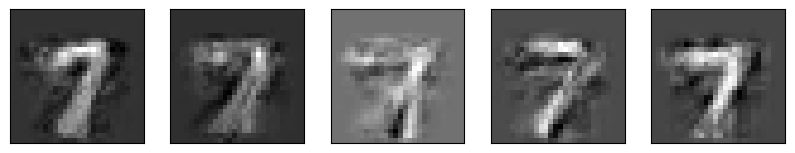

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))                

for i in range(5):

    plt.subplot(1,5,i+1)

    plt.imshow(gan[i].reshape((28,28)),cmap='gray')

    plt.xticks([])

    plt.yticks([])

plt.show()    



### 2) 가우시안혼합모형
* K개의 다변수정규분포를 합한 확률분포
* K 사전정의
* EM 알고리즘으로 파라메터 찾기(iterative한 학습)
* 잠재변수에 따른 분포를 선택

In [75]:
from sklearn.datasets import load_iris

from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

import pandas as pd

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])

#df.info()

print(type(iris))
iris.target






<class 'sklearn.utils._bunch.Bunch'>


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [78]:
#확률 기반 군집화(데이터 포인트가 각 클러스터에 속할 확률 계산)
gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)

lables = gmm.predict(iris.data)

print(lables)

df['gmm_cluster'] = lables

df['target'] = iris.target

result = df.groupby(['target'])['gmm_cluster'].value_counts()
#result = df.groupby(['target']).value_counts()

print(result)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


In [15]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(iris.data)

lables = kmeans.predict(iris.data)

df['kmeans_cluster'] = lables

result = df.groupby(['target'])['kmeans_cluster'].value_counts()

print(result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: count, dtype: int64


c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [84]:
#학습 시간이 오래 걸림
import numpy as np

from tensorflow.keras.datasets import mnist

from sklearn.mixture import GaussianMixture

(x_train,y_train),(x_test,y_test)=mnist.load_data()
print("x_train.shape: ", x_train.shape)
X=x_train[np.isin(y_train,[0])] # class 0만 선택
print("X.shape: ", X.shape)
X=X.reshape((X.shape[0],28*28))
print("X.shape: ", X.shape)
#gm=GaussianMixture(n_components=8).fit(X)  # 8개의 클러스터

x_train.shape:  (60000, 28, 28)
X.shape:  (5923, 28, 28)
X.shape:  (5923, 784)


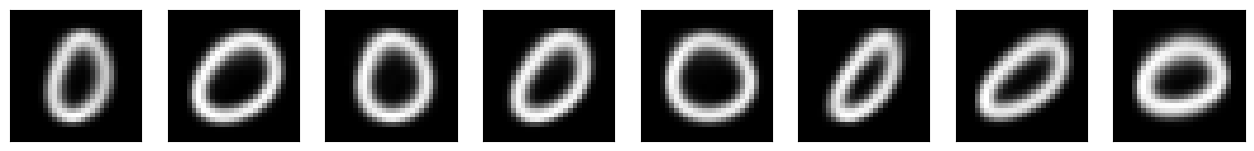

In [17]:
# 학습된 8개의 가우시안 평균 그래프

import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))        

for i in range(8):

    plt.subplot(1,10,i+1)

    plt.imshow(gm.means_[i].reshape((28,28)),cmap='gray')

    plt.xticks([])

    plt.yticks([])

    

plt.show()

[[ 1.27885497e-03 -7.70623894e-04 -3.16848920e-04 ...  7.02011387e-04
   6.28242226e-04  7.49857109e-04]
 [ 2.65145329e-04 -1.02228395e-03 -2.13571631e-03 ...  3.69851045e-03
   1.59137269e-03  2.88794209e-05]
 [ 4.11851443e-04 -4.59497753e-05  4.74509899e-04 ... -7.72148709e-04
   5.59548059e-04 -1.14123872e-03]
 ...
 [ 1.36659619e-03  1.38973046e-03 -1.42188718e-03 ... -1.45000192e-03
   1.37111212e-03  2.21877816e-04]
 [-1.94726237e-04  1.56961111e-04  8.53177579e-05 ...  4.83449082e-04
   1.42653500e-03 -4.02272357e-04]
 [ 6.26890196e-04 -3.47278523e-04  3.88025124e-04 ...  4.54390934e-04
   8.99096113e-04  4.13333439e-04]]


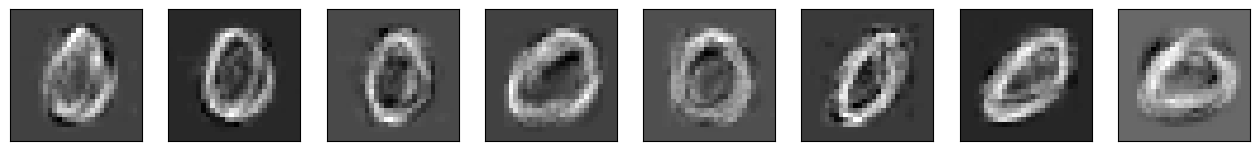

In [18]:
#학습된 확률 기반으로 새로운 샘플 생성

gan=gm.sample(n_samples=8)

print(gan[0])

plt.figure(figsize=(16,4))        

for i in range(8):

    plt.subplot(1,8,i+1)

    plt.imshow(gan[0][i].reshape((28,28)),cmap='gray')

    plt.xticks([])

    plt.yticks([])

    

plt.show()

### 3) 정형데이터 2차함수

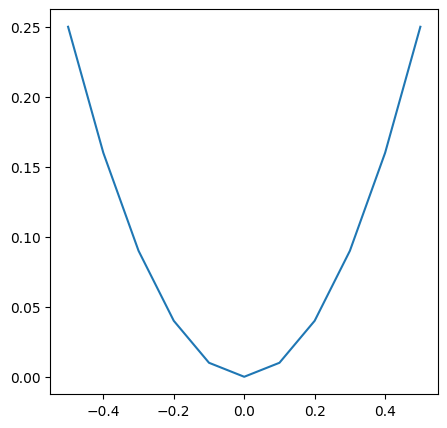

In [19]:
from matplotlib import pyplot as plt

def calculate(x):

    return x * x

inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]

outputs = [calculate(x) for x in inputs]

plt.figure(figsize=(5,5))

plt.plot(inputs, outputs)

plt.show()

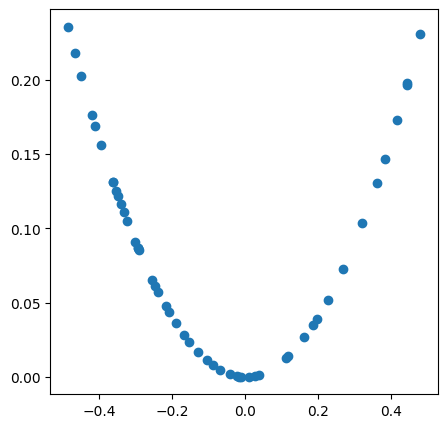

In [20]:
# 랜덤 데이터 생성

import numpy as np

def generate_samples(n=50):

    X1 = np.random.rand(n) - 0.5 # (0.0 ~ 1.0) - 0.5 = -0.5 ~ 0.5

    X2 = X1 * X1

    X1 = X1.reshape(n, 1)

    X2 = X2.reshape(n, 1)

    return np.hstack((X1, X2))

data = generate_samples()

plt.figure(figsize=(5,5))

plt.scatter(data[:, 0], data[:, 1])

plt.show()

In [85]:
from numpy import hstack

from numpy import zeros

from numpy import ones

from numpy.random import rand

from numpy.random import randn

from keras.models import Sequential

from keras.layers import Dense



# 판별 모형
# fake 인지 real 인지 --> 0,1 분류
def define_discriminator(n_inputs=2):

    model = Sequential()

    model.add(Dense(25, activation='relu', input_dim=n_inputs))    

    model.add(Dense(1, activation='sigmoid')) #이진분류(0,1)

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model



# 생성 모형
# fake 값 생성
# latent_dim == ??
def define_generator(latent_dim, n_outputs=2):

    model = Sequential()    

    model.add(Dense(15, activation='relu', input_dim=latent_dim))

    model.add(Dense(n_outputs, activation='linear'))

    return model



# 테스트를 위한 모형
def define_gan(generator, discriminator):

    # 추론모드

    discriminator.trainable = False

    model = Sequential()

    model.add(generator) #생성 모형

    model.add(discriminator) #판별 모형

    model.compile(loss='binary_crossentropy', optimizer='adam')

    return model



# real data 생성
def generate_real_samples(n):

    X1 = np.random.rand(n) - 0.5  # -0.5 ~ 0.5

    X2 = X1 * X1

    X1 = X1.reshape(n, 1)

    X2 = X2.reshape(n, 1)

    X = hstack((X1, X2))

    y = ones((n, 1))

    return X, y



# 랜덤 데이터 생성 함수
def generate_latent_points(latent_dim, n):

    x_input = randn(latent_dim * n)

    x_input = x_input.reshape(n, latent_dim)

    return x_input



# fake data 생성
def generate_fake_samples(generator, latent_dim, n):

    x_input = generate_latent_points(latent_dim, n)

    X = generator.predict(x_input)

    y = zeros((n, 1))

    return X, y

In [86]:
from IPython.display import clear_output

import time

def summarize_performance(epoch, generator, discriminator, latent_dim, n=50):

    # 판별모형 평가(real)
    x_real, y_real = generate_real_samples(n)
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)


    # 판별모형 평가(fake)
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)

    print(epoch, acc_real, acc_fake)


    plt.figure(figsize=(5,5))
    plt.scatter(x_real[:, 0], x_real[:, 1], color='red', label='real')
    plt.scatter(x_fake[:, 0], x_fake[:, 1], color='blue', label='fake')
    plt.xlim([-0.7, 0.7])  
    plt.ylim([-0.1, 0.4])     
    plt.show()

    clear_output(wait=True)

    time.sleep(0.5)   

In [87]:
# 판별모형 훈련

def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=25, n_eval=5):

    half_batch = int(n_batch / 2)

    for i in range(n_epochs):


        # real data 훈련
        x_real, y_real = generate_real_samples(half_batch)
        d_model.train_on_batch(x_real, y_real)

        # fake data 훈련
        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        d_model.train_on_batch(x_fake, y_fake)

        
        # 생성모델에 입력할 x 데이터
        x_gan = generate_latent_points(latent_dim, n_batch)

        # 생성모델에 입력할 y 데이터(1)
        y_gan = ones((n_batch, 1))

        # 생성모델 훈련
        gan_model.train_on_batch(x_gan, y_gan)
        if (i+1) % n_eval == 0:
            summarize_performance(i, g_model, d_model, latent_dim)

In [88]:
# size of the latent space, 잠재공간 사이즈

latent_dim = 5

# 판별모형 생성

discriminator = define_discriminator()

In [89]:
# 생성모형 생성
generator = define_generator(latent_dim)

In [90]:
# GAN 모형 생성

gan_model = define_gan(generator, discriminator)

In [91]:
train(generator, discriminator, gan_model, latent_dim)

# epochs / real accuracy / fake accuracy

#9999 0.23999999463558197 0.5799999833106995

KeyboardInterrupt: 

### 4) 정형데이터 변수 1개

In [32]:
import pandas as pd

df = pd.read_csv('d:/data/concrete.csv')

df.head()

,cement,flag,ash,water,superplastic,coarseagg,findagg,age,strength,class
0,164.2,0.0,200.1,181.2,12.6,849.3,846.0,28,15.09,0
1,164.0,0.0,200.0,181.0,13.0,849.0,846.0,28,15.09,0
2,158.0,0.0,195.0,220.0,11.0,898.0,713.0,28,8.54,0
3,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28,15.34,0
4,167.0,187.0,195.0,185.0,7.0,898.0,636.0,28,23.89,0


In [33]:
real_data=df['strength'].values

real_data

array([15.09, 15.09,  8.54, ..., 39.46, 37.92, 32.77])

In [34]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

scaled=sc.fit_transform(df[['strength']])

scaled[:10]

real_data=scaled

real_data

array([[0.1589635 ],
       [0.1589635 ],
       [0.0773639 ],
       ...,
       [0.46256385],
       [0.4433786 ],
       [0.37922013]])

In [35]:
from tensorflow.keras.layers import Input, Dense

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import RMSprop

import numpy as np

# 모델 파라미터 설정

d_input=1 #변수의 개수

d_hidden = 256

d_output = 1

g_input = 32

g_hidden = 256

g_output = d_input

# fake 데이터 생성

def makeZ(m, n):

    z = np.random.uniform(-1.0, 1.0, size=[m, n])

    return z

def myOptimizer(lr):

    return RMSprop(learning_rate=lr)

    

# 판별 모델

def build_D():

    d_x = Input(batch_shape=(None, d_input))

    d_h = Dense(d_hidden, activation='relu')(d_x)

    d_o = Dense(d_output, activation='sigmoid')(d_h)

    

    d_model = Model(d_x, d_o)

    d_model.compile(loss='binary_crossentropy', optimizer=myOptimizer(0.0001))


    return d_model


# 생성 모델
def build_G():

    g_x = Input(batch_shape=(None, g_input))

    g_h = Dense(g_hidden, activation='relu')(g_x)

    g_o = Dense(g_output, activation='linear')(g_h)

    g_model = Model(g_x, g_o)

    return g_model

    

# GAN 모델
def build_GAN(discriminator, generator):

    discriminator.trainable = False # 추론모드

    z = Input(batch_shape=(None, g_input))

    Gz = generator(z)

    DGz = discriminator(Gz)

    

    gan_model = Model(z, DGz)

    gan_model.compile(loss='binary_crossentropy', optimizer=myOptimizer(0.0005))

    

    return gan_model



In [36]:
real_data

array([[0.1589635 ],
       [0.1589635 ],
       [0.0773639 ],
       ...,
       [0.46256385],
       [0.4433786 ],
       [0.37922013]])

In [37]:
from tensorflow.keras import backend as K

# 학습

K.clear_session()

D = build_D() # discriminator

G = build_G() # generator

GAN = build_GAN(D, G) # GAN

In [38]:
D.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 256)               512       
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 769
Trainable params: 0
Non-trainable params: 769
_________________________________________________________________


In [39]:
G.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_2 (Dense)             (None, 256)               8448      
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 8,705
Trainable params: 8,705
Non-trainable params: 0
_________________________________________________________________


In [40]:
GAN.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32)]              0         
                                                                 
 model_1 (Functional)        (None, 1)                 8705      
                                                                 
 model (Functional)          (None, 1)                 769       
                                                                 
Total params: 9,474
Trainable params: 8,705
Non-trainable params: 769
_________________________________________________________________


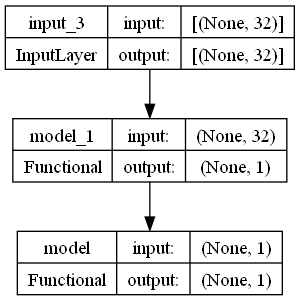

In [48]:
from keras.utils import plot_model
plot_model(GAN, show_shapes=True)

In [41]:
n_batch_cnt = 3

n_batch_size = int( real_data.shape[0] / n_batch_cnt)

EPOCHS = 200

for epoch in range(EPOCHS):

    for n in range(n_batch_cnt):

        from_, to_ = n*n_batch_size, (n+1)*n_batch_size

        if n == n_batch_cnt -1 :

            to_ = real_data.shape[0]

        

        # mini batch

        X_batch = real_data.reshape(-1,1)[from_: to_]

        Z_batch = makeZ(m=X_batch.shape[0], n=g_input)

        Gz = G.predict(Z_batch) # 가짜 데이터로부터 분포 생성

        #print(Gz.shape)

        # 판별모형 학습 데이터 준비

        d_target = np.zeros(X_batch.shape[0]*2)

        d_target[:X_batch.shape[0]] = 1

        d_target[X_batch.shape[0]:] = 0  

        bX_Gz = np.concatenate([X_batch, Gz])

        

        # 생성모형 학습 데이터 준비

        g_target = np.zeros(Z_batch.shape[0])

        g_target[:] = 1

        

        # discriminator 학습        

        loss_D = D.train_on_batch(bX_Gz, d_target)

        

        # generator 학습        

        loss_G = GAN.train_on_batch(Z_batch, g_target)

        

    if epoch % 10 == 0:

        z = makeZ(m=real_data.shape[0], n=g_input)

        print("Epoch: %d, D-loss = %.4f, G-loss = %.4f" %(epoch, loss_D, loss_G))

11/11 [==============================] - 0s 1ms/step
Epoch: 0, D-loss = 0.6907, G-loss = 0.6891
11/11 [==============================] - 0s 1ms/step
Epoch: 10, D-loss = 0.6958, G-loss = 0.6849
11/11 [==============================] - 0s 2ms/step
Epoch: 20, D-loss = 0.6918, G-loss = 0.6958
11/11 [==============================] - 0s 1ms/step
Epoch: 30, D-loss = 0.6933, G-loss = 0.6892
11/11 [==============================] - 0s 1ms/step
Epoch: 40, D-loss = 0.6932, G-loss = 0.6931
11/11 [==============================] - 0s 1ms/step
Epoch: 50, D-loss = 0.6931, G-loss = 0.6930
11/11 [==============================] - 0s 1ms/step
Epoch: 60, D-loss = 0.6931, G-loss = 0.6938
11/11 [==============================] - 0s 1ms/step
Epoch: 70, D-loss = 0.6931, G-loss = 0.6934
11/11 [==============================] - 0s 1ms/step
Epoch: 80, D-loss = 0.6931, G-loss = 0.6936
11/11 [==============================] - 0s 1ms/step
Epoch: 90, D-loss = 0.6931, G-loss = 0.6934
11/11 [========================

33/33 [==============================] - 0s 1ms/step


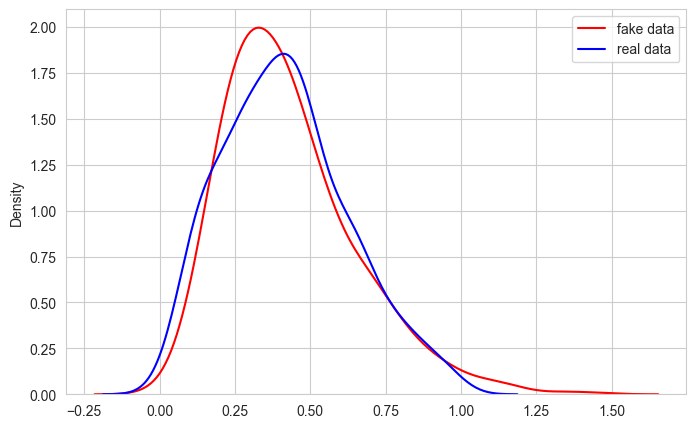

In [42]:
import matplotlib.pyplot as plt

import seaborn as sns

# 학습 완료 후 데이터 분포 시각화

z = makeZ(m=real_data.shape[0], n=g_input)

fake_data = G.predict(z)

plt.figure(figsize=(8, 5))

sns.set_style('whitegrid')

sns.kdeplot(fake_data[:, 0], color='red', bw_method=0.3, label='fake data')

sns.kdeplot(real_data.reshape(-1,1)[:, 0], color='blue', bw_method=0.3, label='real data')

plt.legend()

plt.show()

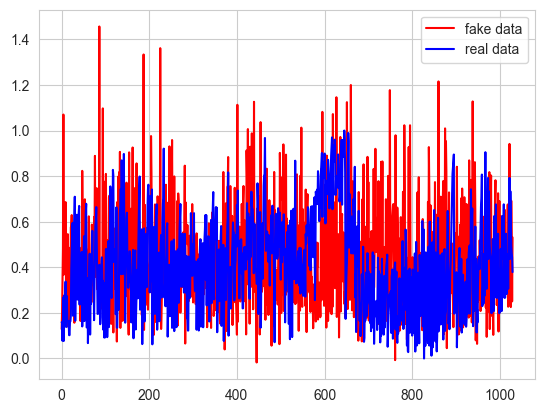

In [43]:
plt.plot(fake_data[:, 0], color='red', label='fake data')

plt.plot(real_data.reshape(-1,1)[:, 0], color='blue', label='real data')

plt.legend()

plt.show()



In [44]:
from sklearn.metrics import mean_squared_error

real_data = sc.inverse_transform(real_data)

fake_data = sc.inverse_transform(fake_data)

print(mean_squared_error(real_data, fake_data))

print(np.sqrt(mean_squared_error(real_data, fake_data)))

609.6080903489762
24.69024281672775


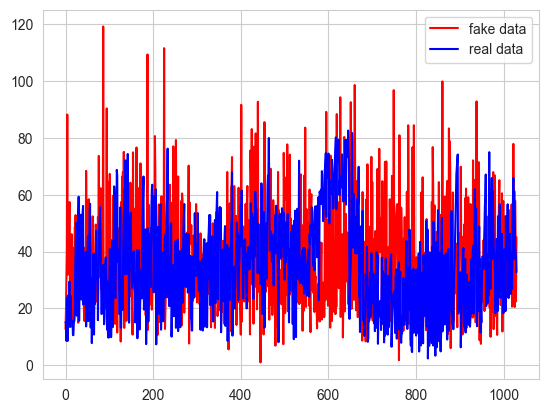

In [45]:
plt.plot(fake_data[:, 0], color='red', label='fake data')

plt.plot(real_data.reshape(-1,1)[:, 0], color='blue', label='real data')

plt.legend()

plt.show()